# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

De soortelijke warmte kan je bepalen met behulp van de warmte overdracht die er plaatsvind tussen twee tijdsintervallen, Hiervoor geldt de volgende formule.

$$Q = c m \Delta T $$

Hierbij is Q de energie in Joule,
delta T is het verschil in de temperatuur in Kelvin,
c de soortelijke warmte in joule/kilogram*kelvin,
en m de massa in kilogram

Hierbij geldt:

$$Q = P t $$

hierbij is P het vermogen in Watt en t de tijd in seconde.
Om de soortelijke warmte te bepalen worden deze twee formules samen gebruikt om met de volgende formule de soortelijke warmte te kunnen bepalen:

$$c = P t/m \Delta T $$

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.

**Procedure:**

Om te beginnen moet de opstelling klaar gezet worden. Hiervoor is het nodig om de maatbeter te vullen met 400 ml water. Daarbij is het verstandig om de tafel zo vrij mogelijk te hebben, aangezien er gewerkt wordt met water.

Vervolgens kan de temperatuursensor in het water geplaatst worden. Noteer om te beginnen de begintemperatuur, deze is nodig om straks het temperatuurverschil te bepalen. 

Plaats vervolgens de weerstand in het water, het is hierbij belangrijk dat de temperatuursensor niet de weerstand aanraakt, wanneer dit is gelukt kan de bronspanning worden aangesloten, zodat het water verwarmd wordt. Neem hierbij een vermogen van 20 W. Zet vervolgens ook de roerder aan.

Meet vervolgens elke 10 seconde de temperatuur en noteer deze.

Na 24 metingen (oftewel 4 minuten), moet de bronspanning worden afgesloten.

Bepaal vervolgens het temperatuurverschil (Delta_T) per meting. Het temperatuurverschil is gelijk aan de gemeten temperatuur per meting min de begintemperatuur.

Plot de Delta_T tegen de tijd.

Voeg een curve-fit toe, met de volgende functie.

$$ Pt = cm \Delta T$$

Bepaal met deze curve fit de soortelijke warmte van water.

Als alles is gelukt, ruim de opstelling netjes op.

```

```


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit 

# Hier de data en de analyse

m = 0.2                                                                     # Massa water (kg)
P = 20
T_0 = 18.6

t = np.linspace(10, 240, 24)
T_m = np.array([18.8, 19.0, 19.1, 19.1, 19.2, 19.2, 19.2, 19.3, 19.5, 19.5, 19.5, 19.9, 20.4, 20.5, 20.6, 20.8, 20.9, 21.0, 21.1, 21.3, 21.4, 21.5, 21.6, 21.7])                                                  # Temperatuurverschil (K)

Delta_T = T_m - T_0


def DT(t, c_w):
    return (P * t) / (m * c_w)


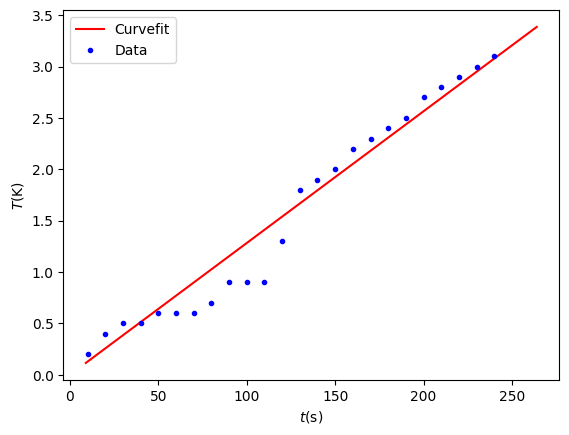

The C_w is (7796.3 ± 173.2) J/kgK.


In [4]:
# Sla figuren op met  
# 
# plt.savefig("figures/naam.png", dpi=450)

popt_DT, pcov_DT = curve_fit(DT, t, Delta_T, p0=(4180))


min_value_t = np.min(t)
max_value_t = np.max(t)

x_DT = np.linspace(0.9*min_value_t, 1.1*max_value_t, 1000)
y_DT = DT(x_DT, *popt_DT)

# Maken van de grafiek
plt.figure()
plt.xlabel('$t$(s)')
plt.ylabel('$T$(K)')

plt.plot(x_DT, y_DT, 'r-', label='Curvefit')
plt.plot(t, Delta_T, 'b.', label='Data')
plt.legend()
#plt.savefig("Figuren/naam.png", dpi=450)
plt.show()

c_w = popt_DT[0]
u_c_w = np.sqrt(pcov_DT[0,0])

print('The C_w is (%.1f \u00B1 %.1f) J/kgK.' %(c_w, u_c_w))



# Discussie en conclusie

Uit de metingen komt een waarde voor de soortelijke warmte van water van 7796.3 +/- 173.2 J/kgK. Dit is een heel stuk hoger dan de literatuurwaarde van 4186 J/kgK. Deze grote afwijking van een bijna 2 keer zo'n grote soortelijke warmte kan door verschillende meetfouten komen. 
Ten eerste was de meting begonnen op het moment dat de weerstand nog niet warm was geworden, er werd dus eerst energie ingestoken om de weerstand te verwarmen, die wel is meegerekend als energie die in de verwarming van het water is gegaan.
Ook was de thermometer niet heel nauwkeurig, de metingen werden niet heel vaak uitgevoerd waardoor onze korte intervallen van 10 seconde per meting voor in het totaal maar 4 minuten, niet accuraat genoeg om de precieze metingen te kunnen bevestigen.
Hieruit kan geconcludeerd worden dat onze meetmethode niet nauwkeurig genoeg is om een goede benadering te krijgen van de soortelijke warmte van water. Om betere meetresultaten te krijgen zou je de metingen pas kunnen starten als het verwarmingselement zelf al warm is geworden, ook zou je nauwkeuriger meetapperatuur kunnen gebruiken en zou je met meer metingen over een langere tijd een beeter reslutaat kunnen krijgen.